In [1]:
%%capture
from __future__ import annotations

# To reload modules on update without restarting the kernel
%load_ext autoreload
%autoreload 2

from helpers import Corpus, Model
from sentence_transformers import SentenceTransformer

In [2]:
core_concepts = {
    "artificial intelligence" : {
        "ai domain" : {},
        "ai system" : {
            "no risk ai system" : {},
            "high risk ai system" : {},
            "low risk ai system" : {},
            "ai system properties" : {},
            
        },
        "ai system development process" : {
            "ai system approach" : {},
            "ai system quality measure" : {},
            
        },
    },

    "data" : {
        "personal data" : {},
        "anonymous data" : {},
    },

    "organization or person" : {
        "provider" : {},
        "user" : {
            "affected entity" : {},
        },
        "regulator" : {
            "eu country" : {},
        },
    },

    "risk": {
        "data risk" : {
            "poisoning risk" : {},
        },
        "system risk" : {
            "terrorist attack risk" : {},
        },
        "risk management" : {},
    },

    "law": {
        "regulation": {
            "right": {},
            "rule": {},
            "requirement": {},
            "obligation": {},
        },
        "law text": {},
        "authority": {},
    },

    "market": {
        "product": {},
        "service": {},
    },

    "other": {},
}

In [3]:
# Corpus based around top level core concepts
corpus = Corpus(
    source = r".\Data\IA Regulation Taxonomy.xlsx",
    core_concepts = core_concepts
)
# corpus = Corpus()

['artificial intelligence', 'ai domain', 'ai system', 'no risk ai system', 'high risk ai system', 'low risk ai system', 'ai system properties', 'ai system development process', 'ai system approach', 'ai system quality measure', 'data', 'personal data', 'anonymous data', 'organization or person', 'provider', 'user', 'affected entity', 'regulator', 'eu country', 'risk', 'data risk', 'poisoning risk', 'system risk', 'terrorist attack risk', 'risk management', 'law', 'regulation', 'right', 'rule', 'requirement', 'obligation', 'law text', 'authority', 'market', 'product', 'service', 'other']
['artificial intelligence', 'data', 'organization or person', 'risk', 'law', 'market', 'other']


In [4]:
# corpus.extract_terms_from_pdf("Data/EU.pdf")
corpus.extract_terms_from_onto()

unique terms:  900


In [5]:
corpus.extract_hyponyms()

In [6]:
X, y = corpus.get_training_data()

In [7]:
model = Model(corpus, min_points=4, dimensions=10, clusterer="c-dbscan", reducer="umap")
# model = Model(corpus, min_points=4, dimensions=10, classifier="svm", reducer="none")

cannot links:21
must links:30
-0.0051301536


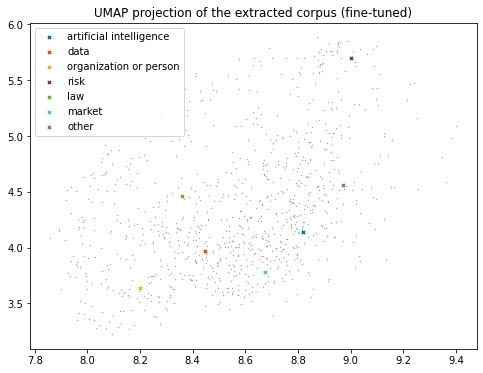

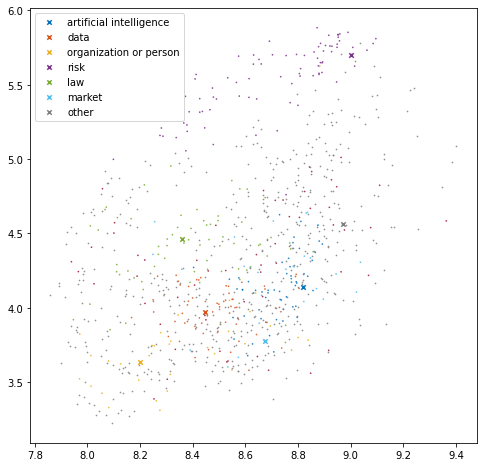

cluster size :
|-artificial intelligence : 57
|-data : 63
|-organization or person : 35
|-risk : 82
|-law : 69
|-market : 29
|-other : 601
  |-unlabeled terms within 'other': 541
0.10663835


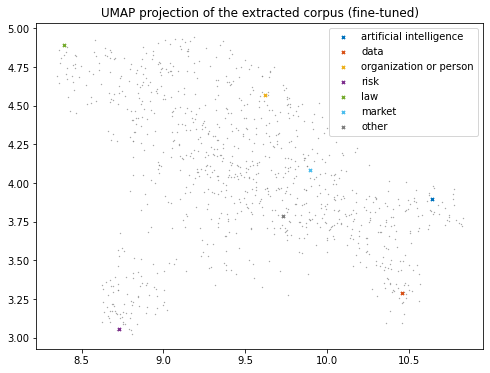

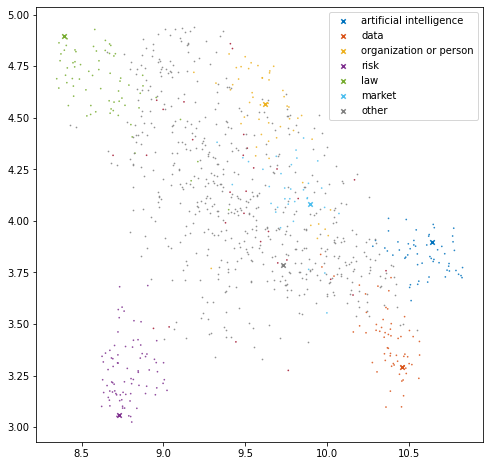

cluster size :
|-artificial intelligence : 57
|-data : 63
|-organization or person : 52
|-risk : 82
|-law : 69
|-market : 35
|-other : 578
  |-unlabeled terms within 'other': 547
0.13209267


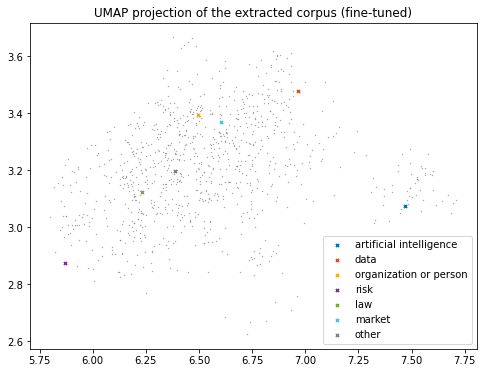

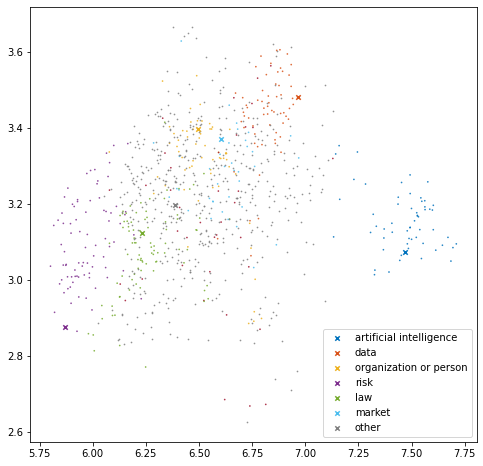

cluster size :
|-artificial intelligence : 59
|-data : 63
|-organization or person : 62
|-risk : 82
|-law : 89
|-market : 38
|-other : 543
  |-unlabeled terms within 'other': 504
0.17843321


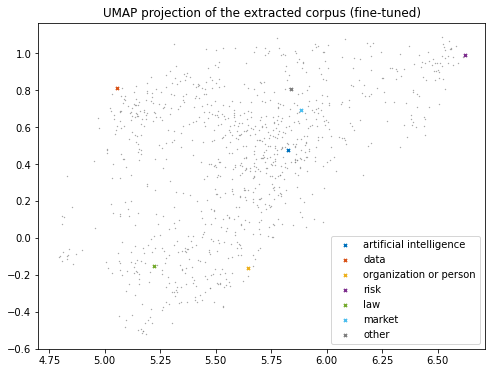

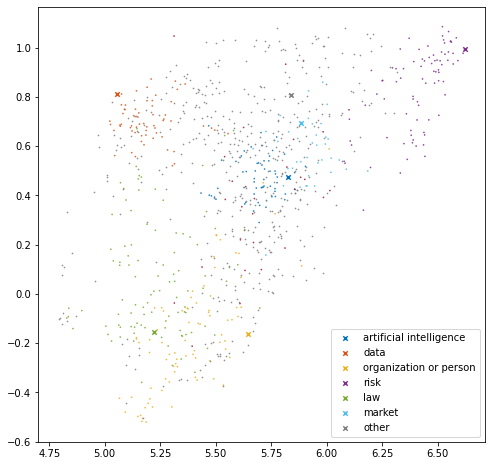

cluster size :
|-artificial intelligence : 60
|-data : 63
|-organization or person : 82
|-risk : 82
|-law : 101
|-market : 40
|-other : 508
  |-unlabeled terms within 'other': 478
0.19025019


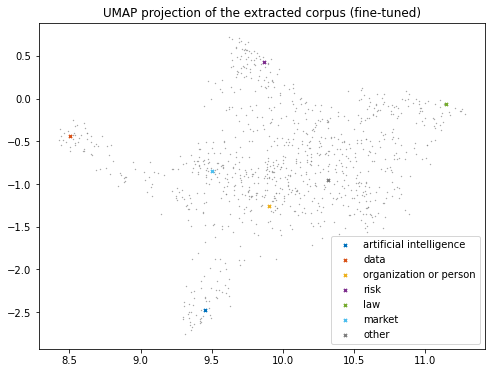

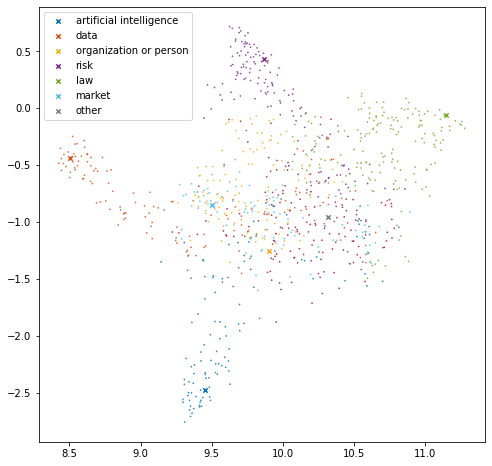

cluster size :
|-artificial intelligence : 122
|-data : 143
|-organization or person : 126
|-risk : 139
|-law : 171
|-market : 86
|-other : 149
  |-unlabeled terms within 'other': 0


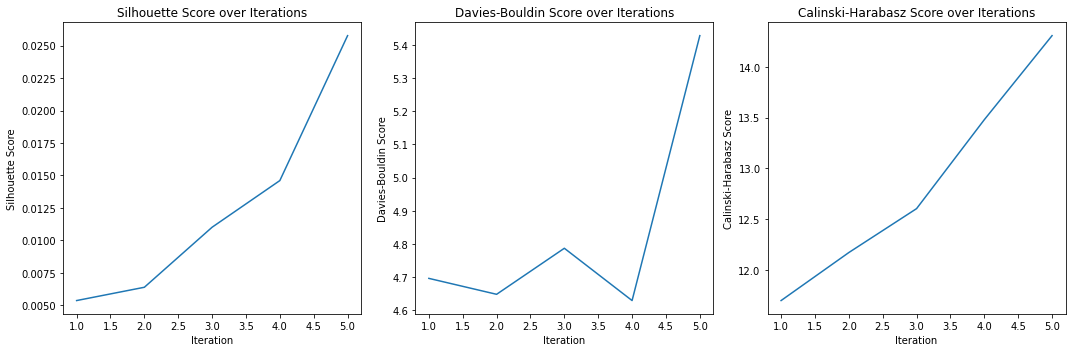

Silhouette : 0.025763815
Davies Bouldin : 5.42742707342254
Calinski Harabasz : 14.307225593346848


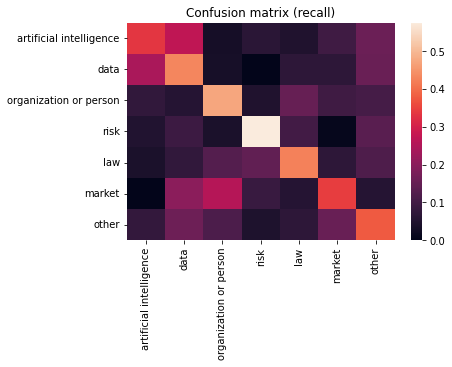

size of predicted terms: 900
Accuracy : 0.4211111111111111
Precision : 0.4994849479179776
Recall : 0.4211111111111111
f1 : 0.43983199610967316
                               Term               Prediction  \
0                 corrective action  artificial intelligence   
1                         lifecycle                   market   
2                        retirement                   market   
3                 due consideration                      law   
4  biometric identification system                      data   

              Ground truth  
0                      law  
1  artificial intelligence  
2  artificial intelligence  
3                      law  
4  artificial intelligence  


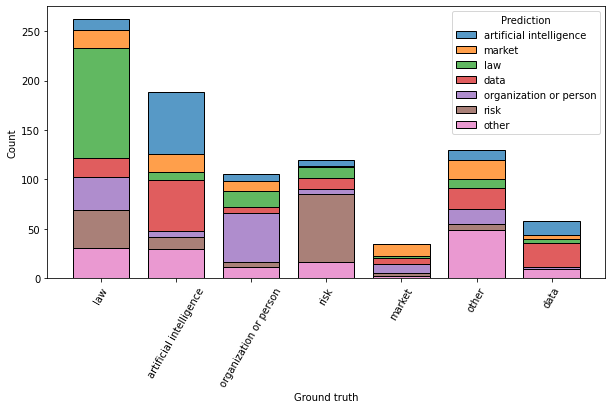

In [8]:
y_pred = model.iterate(X, y, 5,verbose=1)


In [9]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4 4 4 5 5 5 6
 0 0 0 4 1 1 1 0 0 1 1 5 0 2 2 6 1 0 3 0 3 3 4 3 5 5 3 6 6 6 6 5 0 6 0 4 0
 0 6 3 2 5 5 5 6 0 6 6 5 6 6 5 2 5 0 2 6 0 0 0 6 5 1 0 6 5 4 1 1 6 0 1 0 1
 0 0 0 0 1 0 1 0 3 1 1 1 0 0 1 1 6 1 1 0 4 0 1 1 1 1 1 0 6 0 1 0 1 1 6 0 0
 1 0 2 1 6 5 0 3 0 6 6 0 1 1 0 1 1 6 1 5 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 4
 5 5 3 4 4 6 6 0 1 0 0 0 0 0 0 0 6 0 0 0 0 1 0 4 0 3 3 6 6 0 0 1 1 6 0 6 1
 1 3 1 6 6 4 6 5 1 6 0 0 0 1 4 1 1 2 1 4 4 1 5 1 1 1 1 0 6 1 6 1 0 0 0 0 6
 0 1 1 0 1 0 1 6 0 5 1 5 1 6 2 1 0 1 0 1 1 1 6 5 2 1 2 2 2 2 2 5 2 2 2 6 0
 0 0 2 2 2 0 6 6 5 5 3 2 6 2 2 2 6 2 3 2 2 1 2 1 6 5 5 2 4 2 3 2 2 4 2 4 4
 2 2 2 4 2 4 1 2 4 2 2 2 2 4 3 2 4 4 2 2 2 6 4 6 4 2 4 2 2 2 2 6 2 2 6 3 5
 2 5 1 2 5 1 0 0 0 0 5 2 3 3 3 3 3 3 3 3 3 0 3 3 3 3 2 6 4 6 3 6 3 4 1 3 3
 3 3 2 3 3 3 3 3 0 3 4 4 3 3 3 3 3 3 3 3 4 3 6 3 3 3 6 3 3 6 3 3 3 3 3 6 3
 3 3 3 1 3 3 3 1 4 6 3 4 6 3 3 3 0 1 4 1 4 3 4 2 4 6 3 3 3 1 5 6 4 0 1 6 1
 3 0 3 3 6 6 3 1 3 6 2 3 